# Báo cáo Project
Lớp Nhập môn Trí tuệ nhân tạo-154016, Nhóm G14

### 1. Thông tin chung

# Thành viên
- Phạm Văn Thanh 20220042
- Nguyễn Nam 20220037
- Nguyễn Hữu Huy 20220028
- Vũ Thành Đạt 20224952
- Tạ Đăng Dương 20224969

### Lịch thực hiện
- W02: Đăng ký nhóm (Đã xác nhận nhóm đăng ký hoặc phân công 17/9)
- W03: Đề xuất project (22/9 - các thành viên trong nhóm bắt đầu trao đổi, thực hiện project)
- W09: Báo cáo tiến độ giữa kỳ (2/11)
- W15: Hoàn thành và gửi báo cáo project (14/12)
- W16-17: Trình bày project, Q&A

## 2. Đề xuất project (W2-3)

### Bài toán: Nhận diện chữ số trong tập dữ liệu MNIST. 
- Mục tiêu của bài toán là xây dựng một mô hình có khả năng phân loại các chữ số viết tay từ $0$ đến $9$ dựa trên hình ảnh đầu vào.
- Tập dữ liệu MNIST (Modified National Institute of Standards and Technology) chứa $70,000$ hình ảnh grayscale (mức xám) có kích thước 28x28 pixels, trong đó có 60,000 hình ảnh dùng để huấn luyện và $10,000$ hình ảnh để kiểm tra. Mỗi hình ảnh trong tập dữ liệu biểu diễn một chữ số từ $0$ đến $9$, và bài toán là dự đoán chính xác chữ số mà hình ảnh đó đại diện.

### Phương pháp
Phương pháp K-Nearest Neighbors (KNN) là một thuật toán học máy dựa trên nguyên tắc "tương tự gần nhất", thường được sử dụng cho các bài toán phân loại như bài toán nhận diện chữ số trong tập dữ liệu MNIST. KNN thuộc nhóm các thuật toán không tham số (non-parametric) và hoạt động theo cách rất đơn giản nhưng hiệu quả khi áp dụng cho các bài toán với dữ liệu có tính tương đồng rõ ràng. 

Ý tưởng chính của KNN:
- Khi cần dự đoán nhãn của một mẫu mới, thuật toán KNN sẽ tìm K điểm gần nhất trong tập dữ liệu huấn luyện (theo một metric khoảng cách nào đó, ví dụ như khoảng cách Euclid).
- Mẫu mới sẽ được gán nhãn dựa trên nhãn của các điểm láng giềng gần nhất. Nhãn của mẫu mới là nhãn xuất hiện nhiều nhất trong số các láng giềng gần nhất.

### Các bước áp dụng KNN cho bài toán MNIST

#### Bước 1: Chuẩn bị dữ liệu
- Tập dữ liệu MNIST bao gồm $60,000$ ảnh huấn luyện và $10,000$ ảnh kiểm tra. 
- Mỗi ảnh là một ma trận $28$ x $28$, có thể được chuyển đổi thành một vector $784$ chiều.

#### Bước 2: Xác định K
- $K$ là số lượng láng giềng gần nhất mà thuật toán sẽ xét khi phân loại một mẫu mới.
- $K$ thường được chọn là số lẻ để tránh trường hợp có sự cân bằng giữa các nhãn.

#### Bước 3: Định nghĩa khoảng cách
- Khoảng cách giữa các mẫu dữ liệu (giữa các hình ảnh) được đo bằng một trong các metric khoảng cách phổ biến sau:

  1. **Khoảng cách Euclid (Euclidean distance)**:
     - Là loại khoảng cách phổ biến nhất, đo độ dài đường thẳng nối giữa hai điểm trong không gian n chiều.
     - Công thức khoảng cách Euclid giữa hai điểm $\mathcal{x}$ và $\mathcal{y}$ trong không gian $\mathcal{n}$ chiều:

       \begin{align*}
       d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
       \end{align*}

     - Trong bài toán MNIST, mỗi hình ảnh là một vector 784 chiều, nên khoảng cách giữa hai hình ảnh được tính dựa trên sự khác biệt giữa các giá trị pixel tương ứng.

  2. **Khoảng cách Manhattan (Manhattan distance)**:
     - Còn được gọi là khoảng cách "City Block", đo khoảng cách giữa hai điểm dọc theo các trục tọa độ.
     - Công thức khoảng cách Manhattan giữa hai điểm $\mathcal{x}$ và $\mathcal{y}$:

       \begin{align*}
       d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
       \end{align*}

     - Khoảng cách Manhattan thường hữu ích khi bạn muốn đo sự khác biệt mà không quá nhạy cảm với sự thay đổi lớn trong một vài đặc trưng.

  3. **Khoảng cách Minkowski (Minkowski distance)**:
     - Đây là một tổng quát hóa của cả khoảng cách Euclid và Manhattan. Độ đo này được điều chỉnh bằng một tham số \( p \) để có thể thể hiện nhiều loại khoảng cách khác nhau.
     - Công thức khoảng cách Minkowski giữa hai điểm $\mathcal{x}$ và $\mathcal{y}$:

       \begin{align*}
       d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
       \end{align*}

     - Khi $p=2$ khoảng cách Minkowski trở thành khoảng cách Euclid. Khi $ p = 1 $, nó trở thành khoảng cách Manhattan.
- Việc lựa chọn độ đo phù hợp phụ thuộc vào đặc trưng của dữ liệu và yêu cầu cụ thể của mô hình.

#### Bước 4: Phân loại
- Sau khi tính toán khoảng cách từ mẫu mới đến tất cả các mẫu trong tập huấn luyện, **K láng giềng gần nhất** sẽ được chọn.
- Mẫu mới sẽ được gán nhãn dựa trên nhãn của đa số các láng giềng này (sử dụng **bình chọn đa số** - majority voting, hoặc sử dụng **bình chọn dựa trên khoảng cách** - weighted voting)
##### Với các điểm dữ liệu $x_{i_1}, x_{i_2},... x_{i_k}$ được chọn làm láng giềng của điểm dữ liệu $x$, ta xây dựng cách xác định nhãn của $x$ như sau: 
- _Major voting:_
Mọi điểm dữ liệu đều có quyền biểu quyết ngang nhau
 $$label(x) = \arg \max_i{ \{\text{ số các điểm dữ liệu có nhãn $i$ }\}}$$
- _Weghted voting:_ Quyền biểu quyết của các điểm dữ liệu sẽ bị ảnh hưởng bởi độ gần của điểm dữ liệu đó với điểm cần dự đoán
$$ label(x) = \arg \max_i{\sum_{\text{ $p$ có nhãn $i$}} \dfrac{1}{distance(p, x)}}$$

#### Bước 5: Dự đoán
- Dựa vào kết quả từ bước phân loại, mô hình sẽ đưa ra **dự đoán cuối cùng** về nhãn của mẫu mới (chữ số mà hình ảnh đại diện).


### Phân công công việc 
1. Chuẩn hóa dữ liệu  - Huy, Thanh
2. Tối ưu dữ liệu đầu vào - Huy
3. Xây dựng hàm khoảng cách - Huy, Thanh
4. Xây dựng hàm dự đoán - Dương, Đạt, Huy, Thanh
5. Đánh giá mô hình, lựa chọn tham số - Nam
6. Tối ưu hàm tính khoảng cách - Dương
7. Tối ưu hàm dự đoán - Đạt
8. Viết báo cáo - Nam

Phần trăm công việc thực viện của từng thành viên: 
| Dương | Đạt | Huy | Nam | Thanh | 
|-------|-----|-----|-----|-------|
| $0\%$ | $20\%$ | $20\%$ | $20\%$ | $20\%$ | 

## 3. Tiến độ giữa kỳ (W9)

## Chương trình

In [1]:
# import required library
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


#### Visualize data

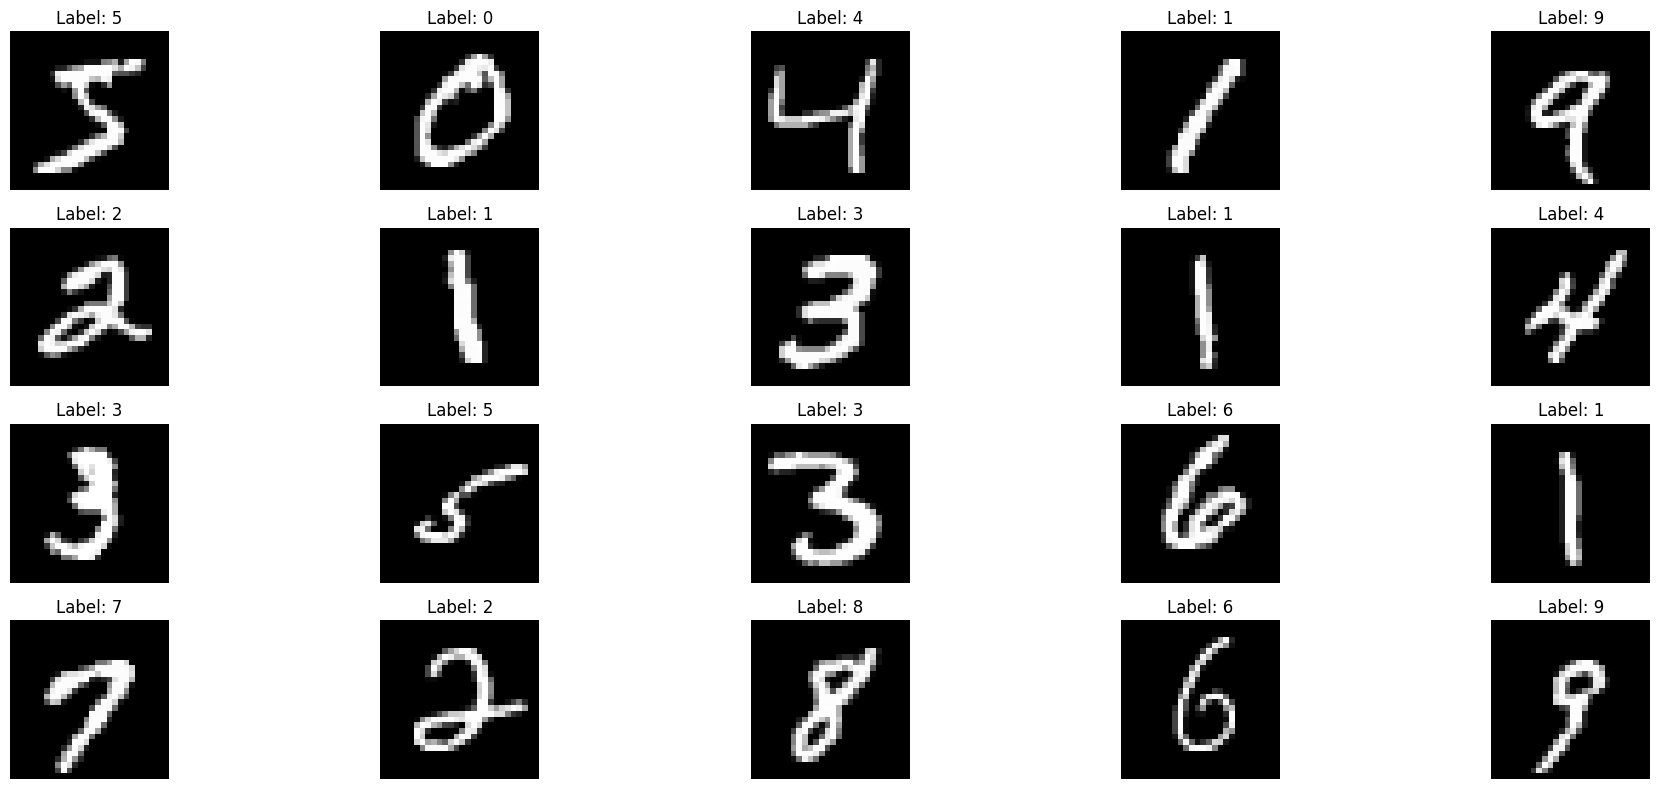

In [ ]:
num_samples_to_display = 20

plt.figure(figsize=(20, 8))  
for i in range(num_samples_to_display):
    plt.subplot(4, 5, i + 1)  
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')  
    plt.title(f"Label: {y_train[i]}")  
    plt.axis('off')  
plt.tight_layout()  
plt.show()

### Chuẩn hóa dữ liệu

Chuyển dữ liệu về dạng 2 chiều, mỗi hàng là một điểm dữ liệu có số chiều là $28\times28$

In [11]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
class preProcessor:
    def __init__(self, data):
        self.data = data

    def min_max_scale(self, scale_range=(0, 1)):
        min_val, max_val = scale_range
        scaled_data = (self.data / 255.0) * (max_val - min_val) + min_val
        return scaled_data

    def z_score_normalize(self):
        mean = np.mean(self.data, axis=0)
        std = np.std(self.data, axis=0)
        normalized_data = (self.data - mean) / (std + 1e-8)  # avoid division by zero
        return normalized_data

In [ ]:
pP_train = preProcessor(X_train)
X_train = pP_train.min_max_scale()

pP_test = preProcessor(X_test)
X_test = pP_test.min_max_scale()
'''
pP_train = preProcessor(X_train)
X_train = pP_train.z_score_normalize()

pP_test = preProcessor(X_test)
X_test = pP_test.z_score_normalize()
'''


In [17]:
class kNN():
    # Initialise
    def __init__(self, k=3, metric='euclidean', p=None, weight='major_voting'):
        self.k = k
        self.metric = metric
        self.p = p
        self.weight = weight
    
    # Euclidean distance (
    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))
    
    # Manhattan distance (l1 norm)
    def manhattan(self, v1, v2):
        return np.sum(np.abs(v1-v2))
    
    # Minkowski distance (lp norm)
    def minkowski(self, v1, v2, p=2):
        return (np.sum(np.abs(v1-v2)**p))**(1/p)
        
    # Store train set
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    # Make predictions based on majority of neighbours
    def major_voting(self, X_test):
        y_pred = []
        for test_point in X_test:
            k_nearest_neighbours = [t[1] for t in self.get_neighbours(test_point)]
            majority = Counter(k_nearest_neighbours).most_common(1)[0][0]
            y_pred.append(majority)
        return np.array(y_pred)
    
    # Make predictions based on weighted votes
    def weighted_voting(self, X_test):
        y_pred = []
        for test_point in X_test:
            k_nearest_neighbours = self.get_neighbours(test_point)
            weighted_votes = {} # dictionnarie: class -> weighted vote
            for (dist, label) in k_nearest_neighbours:
                if dist == 0:
                    y_pred.append(label)
                elif label in weighted_votes:
                    weighted_votes[label] += 1 / dist
                else:
                    weighted_votes[label] = 1 / dist
            # Get the class with the highest weighted vote
            majority = max(weighted_votes, key=weighted_votes.get)
            y_pred.append(majority)
        return np.array(y_pred)
    
   # Get nearest neighbours
    def get_neighbours(self, test_point): #return (dist, label) of k nearest neighbours 
        max_dist = float('inf')
        idx_max = 0
        distances = [(max_dist, -1)] * self.k
        
        # Calculate distance to all points in X_train
        for (train_point, train_label) in zip(self.X_train, self.y_train):
            if self.metric=='euclidean':
                dist = self.euclidean(train_point, test_point)
            elif self.metric=='manhattan':
                dist = self.manhattan(train_point, test_point)
            elif self.metric=='minkowski':
                dist = self.minkowski(train_point, test_point, self.p)
            else:
                raise NameError('Supported metrics are euclidean, manhattan and minkowski')
            
            if(dist < max_dist):
                distance = (dist, train_label)
                distances[idx_max] = distance
                idx_max = np.argmax([distance[0] for distance in distances])
                max_dist = distances[idx_max][0]
        
        # Identify k nearest neighbours
        neighbours = []
        for i in range(self.k):
            neighbours.append(distances[i])
                
        return neighbours
    
    # Predict
    def predict(self, X_test):
        if self.weight == 'major_voting':
            return self.major_voting(X_test)
        elif self.weight == 'weighted_voting':
            return self.weighted_voting(X_test)
        else:
            raise NameError('Supported weights are major_voting and weighted_voting')

In [24]:
# Randomly select some test images to visualize and predict
num_samples_to_visualize = 200  # Number of images to visualize
random_indices = np.random.choice(len(X_test), num_samples_to_visualize, replace=False)  # Random indices

# Run KNN on these random test samples
X_test_random = X_test[random_indices]
y_test_random = y_test[random_indices]


# Apply our kNN algorithm
for metric in ['euclidean', 'manhattan', 'minkowski']:
    clf = kNN(k=5, metric=metric, p=2, weight='major_voting')
    clf.fit(X_train, y_train)
    y_pred_random = clf.predict(X_test_random)
    print(f'Metric: {metric}, accuracy: {accuracy_score(y_pred_random, y_test_random)*100:.2f} %')
    print(f"KNN Classification Report:\n{classification_report(y_pred_random, y_test_random)}")
     

Metric: euclidean, accuracy: 96.00 %
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       1.00      1.00      1.00        16
           2       0.91      0.95      0.93        22
           3       1.00      1.00      1.00        19
           4       0.95      0.95      0.95        21
           5       1.00      0.92      0.96        12
           6       0.94      1.00      0.97        16
           7       0.95      0.91      0.93        23
           8       0.95      0.95      0.95        22
           9       0.92      0.96      0.94        25

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Metric: manhattan, accuracy: 94.50 %
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
    

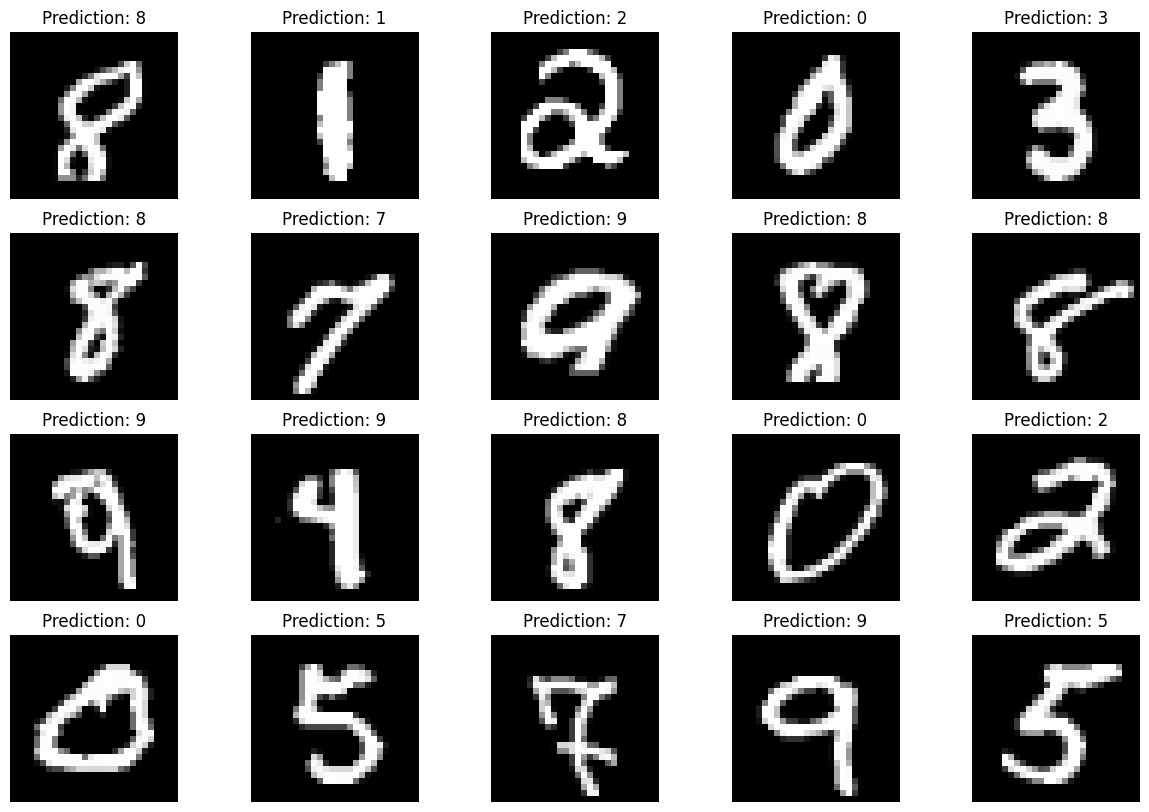

In [32]:
plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test_random[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {y_pred_random[i]}") #y_pred_random[i] using minkowski distance
    plt.axis('off')
plt.show()

### Đánh giá mô hình và lựa chọn tham số

|Chuẩn hóa dữ liệu|Số láng giềng|Hàm khoảng cách| Hàm biểu quyết | Số lượng mẫu dự đoán | Độ chính xác| 
|-----------------|--|---------------|----------------|-------------|---------------|
|Chia 255 | 5 | Euclidean | major_voting | 200 |96.5% | 
|Z-score | 5 | Euclidean | major_voting | 200 | 96.5%| 
|Chia 255 | 5 | Mahattan | major_voting | 200 |96% | 
|Z-score | 5 | Mahattan | major_voting | 200 |96.5% | 
|Chia 255 | 7 | Mahattan | major_voting | 200 | 96.5%| 
|Z-score | 7 | Mahattan | major_voting | 200 |95% | 

Nhận xét: 
- Sử dụng các chuẩn hóa dữ liệu bằng cách chia cho 255 cho kết quả tốt hơn hoặc bằng cách chuẩn hóa `Z-score`.
- Việc sử dụng khoảng cách `Mahattan` cho kết quả sớm hơn so với hàm `Euclidean`. Điều này xảy ra do quá trình tính toán của hàm `Euclidean` phức tạp hơn. 
- Thời gian tính toán vẫn là một vấn đề lớn. Khi chạy trên máy local với RAM 8GB và CPU AMD Ryzen 5, kết quả chạy 200 điểm dữ liệu kiểm tra mất khoảng 1m40s

Với bộ dữ liệu chỉ 200 điểm và không có nhiều sai khác về độ chính xác, chúng tôi cho rằng chưa thể đánh giá chính xác các mô hình. Do đó, yêu cầu đặt ra là cần chạy đủ 10000 bộ dữ liệu trong tập test để có đánh giá đầy đủ về tính chính xác của mô hình  

Ngoài ra, các hàm số tính khoảng cách cũng cần được tối ưu. Hàm `Minkowski` có độ phức tạp cao hơn hai hàm `Euclidean` và `Mahattan` trên với (`p` khác 1, 2). Do đó, việc dùng hàm `minkowski` sẽ không cho kết quả với độ phức tạp về thời gian tốt hơn hai hàm trên 

## Tiến độ giữa kỳ 
Project đã xây dựng được mô hình hoàn toàn bằng python cùng thư viện numpy với độ chính xác cao trên tập kiểm tra $\left(97\% \right)$ . Tuy nhiên, thời gian tính toán mô hình và kích thước bộ nhớ lưu trữ vẫn là một vấn đề trở ngại

In [33]:
# Principal Component Analysis (PCA)
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None

    def fit_transform(self, X):
        # Step 1: Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Step 2: Compute covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Step 3: Compute eigenvalues and eigenvectors
        eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

        # Step 4: Sort eigenvectors by descending eigenvalues
        sorted_indices = np.argsort(eigen_values)[::-1]
        selected_indices = sorted_indices[:self.n_components]
        self.components = eigen_vectors[:, selected_indices]

        # Step 5: Transform the data to the new subspace
        X_pca = X_centered.dot(self.components)

        return X_pca

    def transform(self, X):
        # Step 1: Center the test data using the same mean as training data
        X_centered = X - self.mean

        # Step 2: Transform the data using the principal components obtained from training data
        X_pca = X_centered.dot(self.components)

        return X_pca

In [36]:
# Reduce the dimensionality of the data using PCA on the training set
pca = PCA(n_components=392)
train_X_reduced = pca.fit_transform(train_X)

# Randomly select some test images to visualize and predict
num_samples_to_visualize = 100  # Number of images to visualize
random_indices = np.random.choice(len(test_X), num_samples_to_visualize, replace=False)  # Random indices

# Reduce the dimensionality of the test set using the same PCA
X_test_random = test_X[random_indices]
test_X_reduced = pca.transform(X_test_random)  # Use transform, not fit_transform

y_test_random = test_y[random_indices]

# Define the accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

# Apply kNN algorithm with different distance metrics
for metric in ['euclidean', 'manhattan', 'minkowski']:
    clf = kNN(k=3, metric=metric, p=2)
    clf.fit(train_X_reduced, train_y)
    y_pred_random = clf.predict_weighted(test_X_reduced)
    print(f'Metric: {metric}, accuracy: {accuracy(y_test_random, y_pred_random):.3f} %')


Metric: euclidean, accuracy: 97.000 %
Metric: manhattan, accuracy: 94.000 %
Metric: minkowski, accuracy: 97.000 %


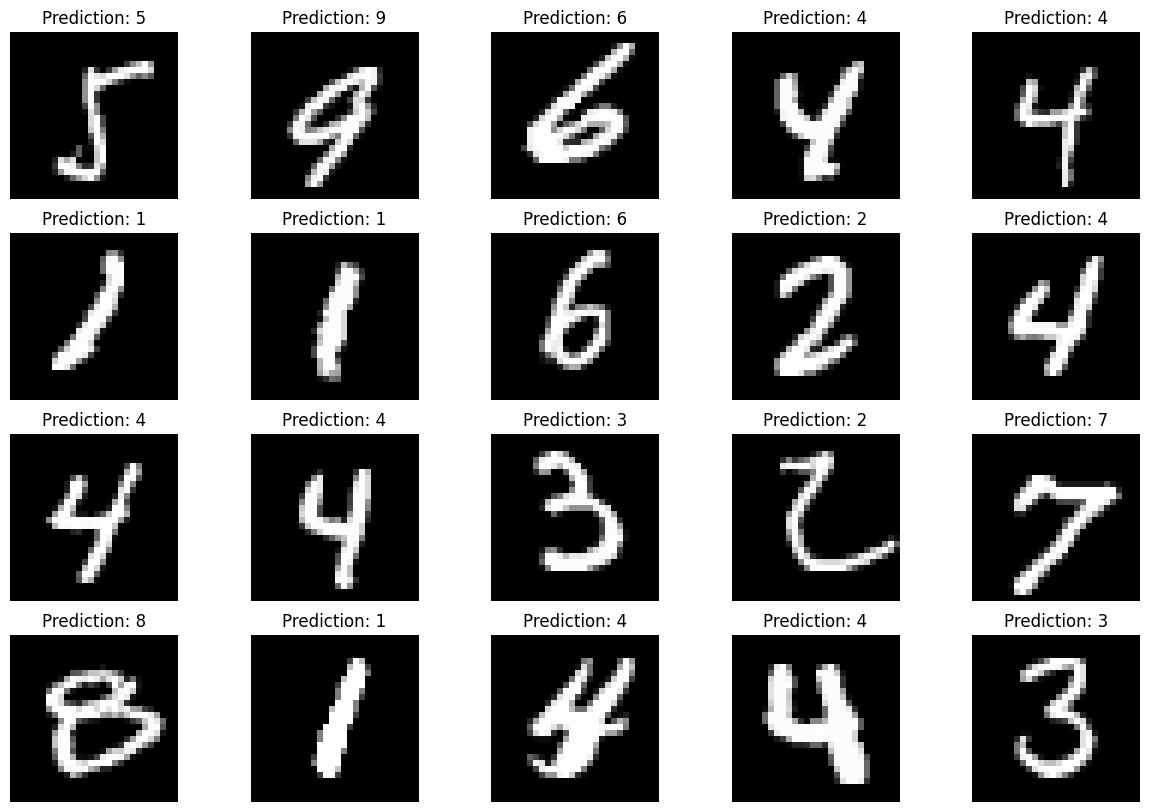

In [37]:
plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test_random[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {y_pred_random[i]}") #y_pred_random[i] using minkowski distance
    plt.axis('off')
plt.show()